In [15]:
import numpy as np
import matplotlib.pyplot as plt
lx = 64
ly = 64

In [16]:
class Anchoring:
    ndefects:np.int64 # total number of defects
    xdefects:np.int64 # total number of defects in x direction
    ydefects:np.int64 # total number of defects in y direction
    xspacing:np.int64 # spacing of defects in x direction
    yspacing:np.int64 # spacing of defects in y direction
    def ___init__(self,ndefects,xdefects,ydefects,xspacing,yspacing):
        self.ndefects = ndefects
        self.xdefects = xdefects
        self.ydefects = ydefects
        self.xspacing = xspacing
        self.yspacing = yspacing
        self.defect_arr = np.zeros((self.xdefects,self.ydefects))

In [21]:
pz_anch = Anchoring()
pz_anch.ndefects = 4
pz_anch.xdefects = 2
pz_anch.ydefects = 2
pz_anch.xspacing = 16
pz_anch.yspacing = 32
pz_anch.defect_arr = np.array([[0.5,-0.5],[-0.5,0.5]])
print(pz_anch.ndefects)
print(pz_anch.defect_arr)

4
[[ 0.5 -0.5]
 [-0.5  0.5]]


In [22]:
def gen_defects(lx,ly,anch):
    nx = np.zeros((lx,ly))
    ny = np.zeros((lx,ly))
    nz = np.zeros((lx,ly))
    xx = np.zeros(anch.ndefects)
    yy = np.zeros(anch.ndefects)
    q = np.zeros(anch.ndefects)
    th = np.zeros((lx,ly))
    id = 0
    if (anch.ndefects >=1):
        for ii in range(1,anch.xdefects+1):
            for jj in range(1,anch.ydefects+1):
                if (anch.xspacing != 0):
                    xx[id] = (ii*anch.xspacing) + 0.5
                    xx[id] = xx[id] + (1.0-(anch.xspacing*(anch.xdefects+1.0))/lx)*(lx/2)
                else:
                    xx[id] = ii*(lx)/(anch.xdefects+1.0)*0.5
                if (anch.yspacing != 0):
                    yy[id] = (jj*anch.yspacing) + 0.5
                    yy[id] = yy[id] + (1.0-(anch.yspacing*(anch.ydefects+1.0))/ly)*(ly/2)
                else:
                    yy[id] = jj*(ly)/(anch.xdefects+1.0)*0.5
                q[id] = anch.defect_arr[ii-1,jj-1]
                id = id + 1
    else:
        id = 1
        xx[0] = lx/2 + 0.5
        yy[0] = ly/2 + 0.5

    for idefect in range(id):
        for i in range(lx):
            for j in range(ly):
                phi = np.arctan((j+1)-yy[idefect])/((i+1)-xx[idefect])
                th[i,j] += q[idefect]*phi + 0.25*np.pi
    
    for i in range(lx):
        for j in range(ly):
            nx[i,j] = 0.5*np.cos(th[i,j])
            ny[i,j] = 0.5*np.sin(th[i,j])
            nz[i,j] = 0.0
    return nx,ny,nz

In [23]:
nx,ny,nz = gen_defects(lx,ly,pz_anch)

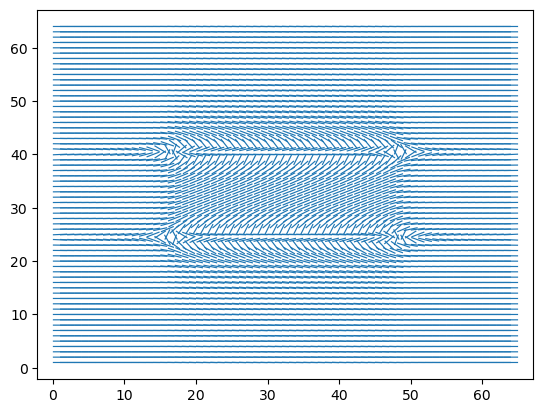

In [25]:
fig,ax = plt.subplots(1,1)
x,y = np.meshgrid(np.arange(1,lx+1,1),np.arange(1,ly+1,1))
u = nx
v = ny
quiver = ax.quiver(x,y,u,v,pivot='mid',headlength=0,headwidth=0,headaxislength=0,color="tab:blue",scale_units='xy',scale=0.25)
plt.show()
